In [1]:
from ggplot import *

In [15]:
import pandas
import datetime

In [16]:
df = pandas.read_csv('turnstile_data_master_with_weather.csv')

In [17]:
print df.head()

   Unnamed: 0  UNIT       DATEn     TIMEn  Hour    DESCn  ENTRIESn_hourly  \
0           0  R001  2011-05-01  01:00:00     1  REGULAR                0   
1           1  R001  2011-05-01  05:00:00     5  REGULAR              217   
2           2  R001  2011-05-01  09:00:00     9  REGULAR              890   
3           3  R001  2011-05-01  13:00:00    13  REGULAR             2451   
4           4  R001  2011-05-01  17:00:00    17  REGULAR             4400   

   EXITSn_hourly  maxpressurei  maxdewpti   ...     meandewpti  meanpressurei  \
0              0         30.31         42   ...             39          30.27   
1            553         30.31         42   ...             39          30.27   
2           1262         30.31         42   ...             39          30.27   
3           3708         30.31         42   ...             39          30.27   
4           2501         30.31         42   ...             39          30.27   

   fog  rain  meanwindspdi  mintempi  meantempi  m

In [18]:
df.describe()

,Unnamed: 0,Hour,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,mindewpti,minpressurei,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
count,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951
mean,65975.000000,10.896158,1095.348478,886.890838,30.031894,57.241302,48.259013,29.892714,52.703526,29.965077,0.167100,0.334245,5.543065,56.169775,64.269729,71.769968,0.172276,0
std,38091.117022,6.892084,2337.015421,2008.604886,0.125689,8.770891,11.305312,0.146384,9.943590,0.130461,0.373066,0.471728,1.982441,6.338875,6.568289,7.627218,0.429005,0
min,0.000000,0.000000,0.000000,0.000000,29.740000,39.000000,22.000000,29.540000,31.000000,29.640000,0.000000,0.000000,1.000000,46.000000,55.000000,58.000000,0.000000,0
25%,32987.500000,5.000000,39.000000,32.000000,29.960000,50.000000,38.000000,29.840000,45.000000,29.910000,0.000000,0.000000,5.000000,52.000000,60.000000,65.000000,0.000000,0
50%,65975.000000,12.000000,279.000000,232.000000,30.030000,57.000000,51.000000,29.910000,54.000000,29.960000,0.000000,0.000000,5.000000,54.000000,63.000000,71.000000,0.000000,0
75%,98962.500000,17.000000,1109.000000,847.000000,30.100000,64.000000,55.000000,29.970000,60.000000,30.050000,0.000000,1.000000,6.000000,60.000000,68.000000,78.000000,0.100000,0
max,131950.000000,23.000000,51839.000000,45249.000000,30.310000,70.000000,66.000000,30.230000,68.000000,30.270000,1.000000,1.000000,12.000000,70.000000,78.000000,86.000000,2.180000,0


In [223]:
turnstile_weather=df

def is_week_day(x):
     d = datetime.datetime.strptime(x, '%Y-%m-%d')
     return d.weekday()

def get_day_name(x):
    if x==0:
        return 'Monday'
    elif x==1:
        return 'Tuesday'
    elif x==2:
        return 'Wednessday'
    elif x==3:
        return 'Thursday'
    elif x==4:
        return 'Friday'
    elif x==5:
        return 'Saturday'
    else:
        return 'Sunday'

turnstile_weather['WEEKDAYn'] =  turnstile_weather['DATEn'].map(is_week_day)

weekday_group =  turnstile_weather.groupby('WEEKDAYn', axis=0, as_index=False).sum()
weekday_group['DAYS_OF_WEEK'] = weekday_group['WEEKDAYn'].map(get_day_name)

#print weekday_group.describe()
plot = ggplot(aes('WEEKDAYn', 'ENTRIESn_hourly'), data=weekday_group) 
p1 = plot + geom_line() + geom_point() + xlab('Weekday Name')

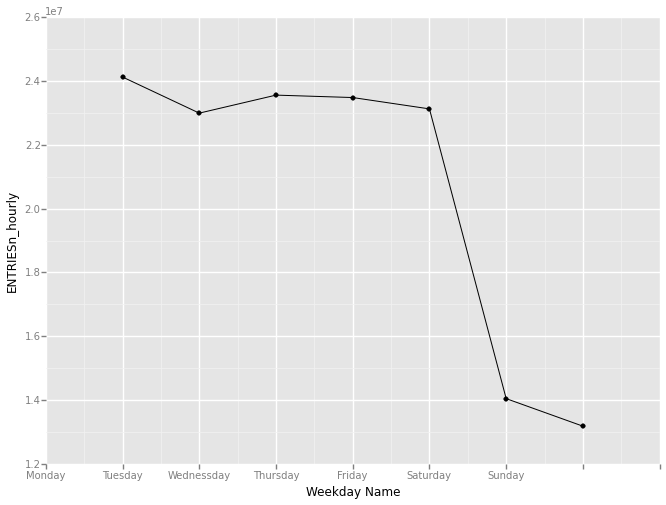

<ggplot: (33065171)>

In [226]:
p1 + scale_y_continuous() + scale_x_continuous(labels=weekday_group['DAYS_OF_WEEK'])

In [227]:
unit_group = turnstile_weather.groupby('UNIT', axis=0, as_index=False).sum()

In [228]:
print unit_group['UNIT'].head()

0    R001
1    R002
2    R003
3    R004
4    R005
Name: UNIT, dtype: object


In [229]:
%matplotlib inline
def conver_unit_to_float(x):
    return int(x[1:])

unit_group['UNITn']   = unit_group['UNIT'].map(conver_unit_to_float)
plot = ggplot(aes('UNITn', 'ENTRIESn_hourly'), data=unit_group) +  geom_point(position='jitter') + xlim(low=0) + ylim(low=0)

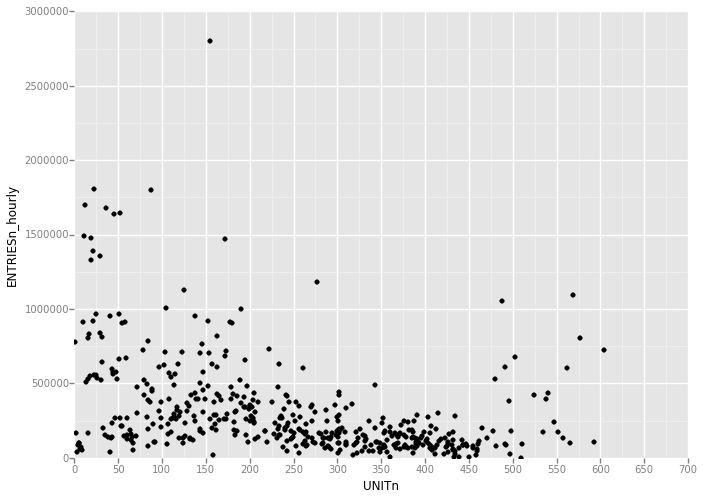

<ggplot: (48062556)>


In [230]:
print plot


In [231]:
plot1 = ggplot(aes(x='UNITn',y='ENTRIESn_hourly',ymin=unit_group['ENTRIESn_hourly'].mean(),ymax=unit_group['ENTRIESn_hourly'].mean()+100000), data=unit_group) +  geom_area() + geom_point()

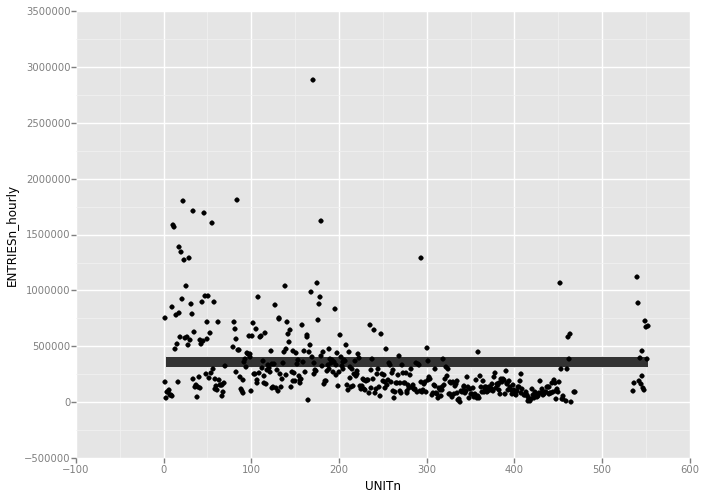

<ggplot: (43578365)>


In [232]:
print plot1

In [233]:
plot2= ggplot(aes(x='UNITn', y='ENTRIESn_hourly'), data=unit_group) + xlab('Station Number') + ylab("Number of people using Subway")  + geom_point() + geom_line() + stat_smooth(color='blue')


    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time-of-day or day-of-week
     * How ridership varies by subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

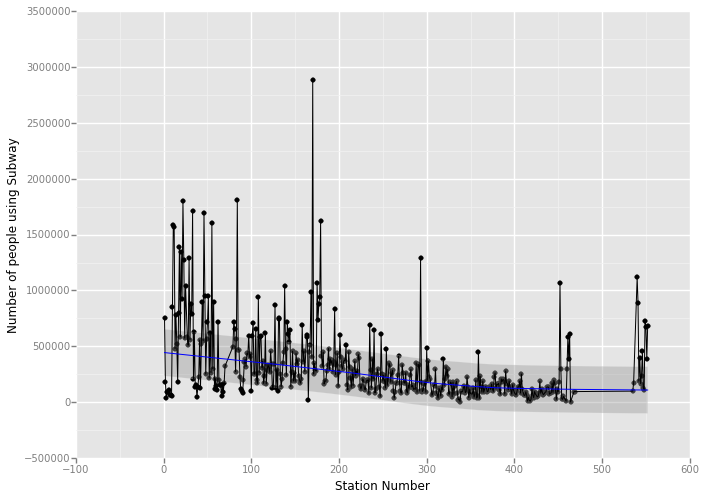

<ggplot: (38114077)>


In [235]:
print plot2

In [245]:
print turnstile_weather[['UNIT', 'Hour', 'ENTRIESn_hourly', 'EXITSn_hourly']].tail()

        UNIT  Hour  ENTRIESn_hourly  EXITSn_hourly
131946  R552    23               19             14
131947  R552    23              158           1022
131948  R552    23               54            275
131949  R552    23               59             46
131950  R552    23              123            108


In [255]:
print  df.describe()

          Unnamed: 0           Hour  ENTRIESn_hourly  EXITSn_hourly  \
count  131951.000000  131951.000000    131951.000000  131951.000000   
mean    65975.000000      10.896158      1095.348478     886.890838   
std     38091.117022       6.892084      2337.015421    2008.604886   
min         0.000000       0.000000         0.000000       0.000000   
25%     32987.500000       5.000000        39.000000      32.000000   
50%     65975.000000      12.000000       279.000000     232.000000   
75%     98962.500000      17.000000      1109.000000     847.000000   
max    131950.000000      23.000000     51839.000000   45249.000000   

        maxpressurei      maxdewpti      mindewpti   minpressurei  \
count  131951.000000  131951.000000  131951.000000  131951.000000   
mean       30.031894      57.241302      48.259013      29.892714   
std         0.125689       8.770891      11.305312       0.146384   
min        29.740000      39.000000      22.000000      29.540000   
25%        29.9

In [258]:
import scipy
scipy.stats.mstats.normaltest(df[df.rain==1]['ENTRIESn_hourly'])

NormaltestResult(statistic=49379.024966302793, pvalue=0.0)

In [ ]:
ggplot(aes())